In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler

import tensorflow as tf
import setuptools._distutils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

tf.keras.backend.clear_session()


In [2]:
# # # # 40000 COLUMNS
# import data
csv_data = pd.read_csv('../data/Road Accident Data.csv', low_memory=False)
# # print(csv_data)

# clean up typo in data
# # print()
csv_data['Accident_Severity'] = csv_data['Accident_Severity'].replace(['Fetal'], ['Fatal'])

# extracting out rows that we want to look at
# # print()
working_data = pd.DataFrame(csv_data[[
    'Day_of_Week',
    'Light_Conditions', 
    'Accident_Severity',  
    'Road_Surface_Conditions', 
    'Speed_limit',
    'Weather_Conditions',
    'Vehicle_Type'
]])

# # print(working_data)

# Show that  data where 'Accident_Severity' is have an unewven distribution where slight is 85% of all data 
# # print()
col = 'Accident_Severity'
unique_values = working_data[col].unique()
# # print(f"Unique values in '{col}': {unique_values}")
# # print(f"No. of val: {working_data[col].value_counts()}")

# seperate data with 'Accident_Severity' Slight from non 'Slight'
# # print()
non_slight_data = working_data[working_data['Accident_Severity'] != "Slight"]
slight_data = working_data[working_data['Accident_Severity'] == "Slight"]

col = 'Accident_Severity'
unique_values = non_slight_data[col].unique()
# # print(f"Unique values in '{col}': {unique_values}")
# # print(f"No. of val: {non_slight_data[col].value_counts()}")
# # print()


unique_values = slight_data[col].unique()
# # print(f"Unique values in '{col}': {unique_values}")
# # print(f"No. of val: {slight_data[col].value_counts()}")

# taking out random 40000 records which data 'Accident_Severity' is 'Slight'
# # print()
slight_data = slight_data.sample(40000)

col = 'Accident_Severity'
unique_values = slight_data[col].unique()
# # print(f"Unique values in '{col}': {unique_values}")
# # print(f"No. of val: {slight_data[col].value_counts()}")

# combine the dataframe
# # print()
combined_df = pd.concat([non_slight_data, slight_data], ignore_index=True)
combined_df = combined_df.sample(frac=1)

# # print(combined_df)

# show the end result
# # print()
col = 'Accident_Severity'
unique_values = combined_df[col].unique()
# # print(f"Unique values in '{col}': {unique_values}")
# # print(f"No. of val: {combined_df[col].value_counts()}")


# Implement Neural Networks

In [3]:
# Create a copy of the DataFrame to avoid modifying the original data
encoded_data = combined_df.copy()

# List of categorical columns to encode
categorical_columns = ['Day_of_Week', 'Light_Conditions', 'Accident_Severity', 
                        'Road_Surface_Conditions', 'Weather_Conditions', 'Vehicle_Type']

# Initialize LabelEncoder for each categorical column
label_encoders = {}

for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    encoded_data[col] = label_encoders[col].fit_transform(encoded_data[col])

# Display the encoded DataFrame
print("Encoded DataFrame:")
print(encoded_data)


Encoded DataFrame:
       Day_of_Week  Light_Conditions  Accident_Severity  \
49172            0                 4                  2   
46029            0                 4                  2   
14632            0                 4                  1   
73146            2                 4                  2   
9644             2                 1                  1   
...            ...               ...                ...   
73801            1                 1                  2   
16353            3                 4                  0   
71747            6                 4                  2   
27928            2                 4                  1   
83741            2                 4                  2   

       Road_Surface_Conditions  Speed_limit  Weather_Conditions  Vehicle_Type  
49172                        4           30                   4            13  
46029                        4           30                   1             2  
14632                        0  

In [4]:
# Assuming 'working_data' is your DataFrame with the required columns
data = encoded_data.copy()

# Convert categorical variables to numerical using LabelEncoder
label_encoders = {}
categorical_columns = ['Day_of_Week', 'Light_Conditions', 'Road_Surface_Conditions', 
                       'Weather_Conditions', 'Vehicle_Type']

for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

# Split data into features (X) and target variable (y)
X = data.drop('Accident_Severity', axis=1)
y = data['Accident_Severity']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions on test set
y_pred = rf_classifier.predict(X_test_scaled)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.52
Classification Report:
              precision    recall  f1-score   support

           0       0.04      0.00      0.00       786
           1       0.51      0.48      0.50      8033
           2       0.52      0.60      0.56      8120

    accuracy                           0.52     16939
   macro avg       0.36      0.36      0.35     16939
weighted avg       0.50      0.52      0.50     16939

Confusion Matrix:
[[   2  472  312]
 [  28 3889 4116]
 [  25 3223 4872]]


In [5]:
# Assuming 'working_data' is your DataFrame with the required columns
data = encoded_data.copy()

# Encode categorical variables
label_encoders = {}
categorical_columns = ['Day_of_Week', 'Light_Conditions', 'Road_Surface_Conditions', 
                       'Weather_Conditions', 'Vehicle_Type', 'Accident_Severity']

for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

# Convert DataFrame to float dtype (after encoding all categorical variables)
data = data.astype(float)

# Split data into features (X) and target variable (y)
X = data.drop('Accident_Severity', axis=1)
y = data['Accident_Severity']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ensure target variable y is numeric
y_train = y_train.astype(int)  # Ensure y_train is of integer dtype
y_test = y_test.astype(int)    # Ensure y_test is of integer dtype

# Initialize Neural Network model
model = Sequential()

# Add input layer and hidden layers
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dropout(0.5))  # Dropout layer to prevent overfitting
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

# Add output layer
model.add(Dense(3, activation='softmax'))  # 3 output classes (Fatal, Serious, Slight)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
print(model.summary())

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Make predictions on test data
y_pred_prob = model.predict(X_test_scaled)  # Get the raw probabilities for each class
y_pred = np.argmax(y_pred_prob, axis=1)  # Determine the class with the highest probability

# Generate classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))  # Set zero_division=0 to handle division by zero

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


c:\school\Y1S2\SC1015\SC1015-MINI_PROJECT\.venv\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,627 (10.26 KB)

 Trainable params: 2,627 (10.26 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
1906/1906 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4889 - loss: 0.9010 - val_accuracy: 0.5204 - val_loss: 0.8416
Epoch 2/50
1906/1906 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5109 - loss: 0.8454 - val_accuracy: 0.5226 - val_loss: 0.8403
Epoch 3/50
1906/1906 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5158 - loss: 0.8419 - val_accuracy: 0.5264 - val_loss: 0.8394
Epoch 4/50
1906/1906 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5119 - loss: 0.8428 - val_accuracy: 0.5187 - val_loss: 0.8397
Epoch 5/50
1906/1906 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5168 - loss: 0.8362 - val_accuracy: 0.5249 - val_loss: 0.8393
Epoch 6/50
1906/1906 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5145 - loss: 0.8397 - val_accuracy: 0.5244 - val_loss: 0.8382
Epoch 7/50
1906/1906 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5163 - loss: 0.8445 - val_accuracy: 0.5249 - val_loss: 0.8392
Epoch 8/50
1906/1906 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5206 - loss: 0.83

In [6]:
print("==========Train data==========")
# Make predictions on training data
y_train_pred_prob = model.predict(X_train_scaled)
y_train_pred = np.argmax(y_train_pred_prob, axis=1)

train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.2f}")

# Generate classification report and confusion matrix for training data
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred, zero_division=1))

print("Training Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))


print()
print("==========Test data==========")
# Make predictions on the test set
y_pred_prob = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_prob, axis=1)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

==========Train data==========
2118/2118 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
Training Accuracy: 0.53
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00      3167
           1       0.53      0.46      0.49     32707
           2       0.52      0.64      0.58     31880

    accuracy                           0.53     67754
   macro avg       0.68      0.37      0.36     67754
weighted avg       0.55      0.53      0.51     67754

Training Confusion Matrix:
[[    0  2118  1049]
 [    0 15167 17540]
 [    0 11436 20444]]

==========Test data==========
530/530 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Accuracy: 0.52
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       786
           1       0.51      0.46      0.48      8033
           2       0.52      0.63      0.57      8120

    accuracy                           0.52     16939
   macro avg    

Random Sample where Accident_Severity is 1.0:
Unique values in 'Day_of_Week': [0. 2. 5. 3. 4. 6. 1.]
No. of val: Day_of_Week
0.0    13624
4.0    12547
5.0    12402
6.0    12362
2.0    12090
1.0    11550
3.0    10118
Name: count, dtype: int64

Unique values in 'Light_Conditions': [4. 1. 3. 0. 2.]
No. of val: Light_Conditions
4.0    60928
1.0    17013
3.0     5700
0.0      745
2.0      307
Name: count, dtype: int64

Unique values in 'Accident_Severity': [2. 1. 0.]
No. of val: Accident_Severity
1.0    40740
2.0    40000
0.0     3953
Name: count, dtype: int64

Unique values in 'Road_Surface_Conditions': [4. 0. 3. 2. 1. 5.]
No. of val: Road_Surface_Conditions
0.0    58325
4.0    22100
2.0     2962
3.0     1127
1.0      120
5.0       59
Name: count, dtype: int64

Unique values in 'Speed_limit': [30. 60. 50. 70. 40. 20. 15.]
No. of val: Speed_limit
30.0    52145
60.0    15793
40.0     6925
70.0     6077
50.0     2963
20.0      788
15.0        2
Name: count, dtype: int64

Unique values in 'Wea

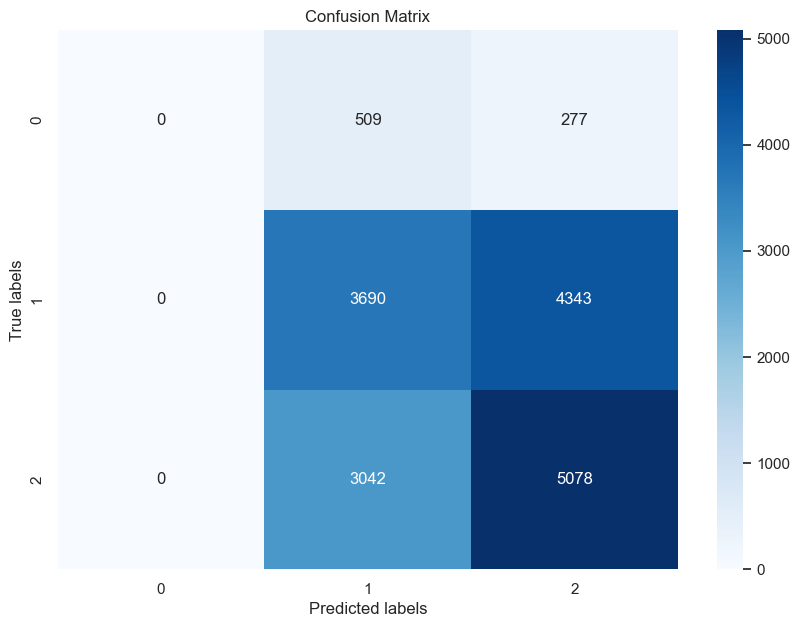

In [7]:
df = pd.DataFrame(data)

df = pd.DataFrame(data)

# Filter the DataFrame to select rows where Accident_Severity is 1.0
filtered_df = df[df['Accident_Severity'] == 2.0]

# Sample 3000 rows randomly from the filtered DataFrame
random_sample_df = filtered_df.sample(n=30, random_state=42)

print("Random Sample where Accident_Severity is 1.0:")
# print(random_sample_df)


for col in data:
    unique_values = data[col].unique()
    print(f"Unique values in '{col}': {unique_values}")
    print(f"No. of val: {data[col].value_counts()}")
    print()

cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sb.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

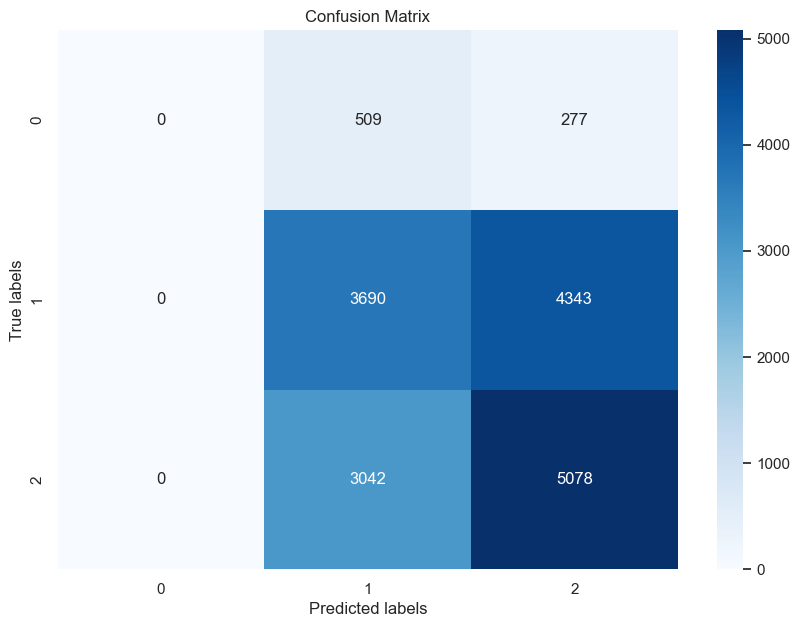

In [8]:
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sb.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()